<a href="https://colab.research.google.com/github/StepanKatin/Recoil_separation_Ra223/blob/main/deff_recoil_nuclier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as m

In [2]:
import pandas as pd
import numpy as np
import random as r

In [3]:
import scipy.integrate as integr

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Введем константы

In [5]:
me = 9.1093837015*10**(-31) #кг масса электрона
Me= 511000 #эВ масса покоя электрона
r0 = 2.818*10**(-15) # м радиус электрона
Ee = 511*10**(3) *  1.602176634*10**(-19) #Дж энергия покоя электрона в джоулях
c = (Ee/me)**(0.5) # вывод константы скорости света м\с
c # м\с

299792766.0075499

# В данном эксперементе рассмаривается пролет ядра отдачи радия 223, образовавшегося в результате альфа-распала 227Th.

> 227Th --> 223Ra + 4He


# Введем данные о ионизирующей частице 223Ra

In [6]:
E = 100*10**3 #эВ энергия отдачи ядра радия 223
M = 223*931.49*10**(9) #МэВ масса ядра радия 223
V = 3.05*10**(5) # м\с скорость ядра отдачи радия 223
B = V/c # коэф. бетта
Z = 2 # заряд ядра отдачи в единицах позитрона


# Введем данные среды
Среда представляет воздух давлением 10 -5 Па, что характерно для высокого вакуума

In [7]:
vkam = 0.0628 #м3 объем полусферической камеры радиусом 0,1 м
I = 14.53 # эВ ионизационный потенциал азота


In [8]:
mol = 10**(-5)*vkam/(8.314*300) # моль воздуха в камере объемом vkam используя уравнение Мендилеева-Клаперона
Na =  6.02214076*10**(23) #число авогадро
Ngaza = Na*mol # шт количество атомов воздуха в объеме камеры
mgaza = mol*29 # г масса воздуха в камере
vkamcm3 = vkam*10**(6) #см3 перевод объема камеры в см3
air_density = mgaza/vkamcm3 # г\см3 плотность воздуха в камере
A_air = 28.98 #а.е.м. среднее массовое число воздуха
Z_air = 7.3 # единицы позитрона примем средний заряд ядер воздуха за заряд ядра азота

# Произведем проверку пригодности формулы Бете-Блоха для расчета (http://nuclphys.sinp.msu.ru/partmat/pm01.htm)

In [9]:
((M*(c**2))/Me)/E

3.6534608515901823e+20

# Вывод предыдущей ячейки подтверждает легитимность использования формулы Бете-Блоха для расчета ионизационных потерь энергии ионизирующей частицы.

>E << (Mc2 )/me



In [10]:
'''def radium_223_ionization_energy_loss_in_air_f(E):
    me = 9.1093837015*10**(-31) #кг масса электрона
    Me= 511000 #эВ масса покоя электрона
    Ee = 511*10**(3) *  1.602176634*10**(-19) #Дж энергия покоя электрона в джоулях
    c = (Ee/me)**(0.5) # вывод константы скорости света м\с
    M = 223*931.49*10**(9) #эВ масса ядра радия 223
    V = 3.05*10**(5) # м\с скорость ядра отдачи радия 223
    B = V/c # коэф. бетта
    Z = 2 # заряд ядра отдачи в единицах позитрона
    air_density = mgaza/vkamcm3 # г\см3 плотность воздуха в камере
    A_air = 28.98 #а.е.м. среднее массовое число воздуха
    Z_air = 7.3 # единицы позитрона примем средний заряд ядер воздуха за заряд ядра азота
    return 1/(3.1*10**(5)*((Z_air*(Z**2)*air_density)/(A_air*(B**2)))*(11.2+m.log((B**2)/(Z_air*(1-B**2)))-B**2)) '''

'def radium_223_ionization_energy_loss_in_air_f(E):\n    me = 9.1093837015*10**(-31) #кг масса электрона\n    Me= 511000 #эВ масса покоя электрона\n    Ee = 511*10**(3) *  1.602176634*10**(-19) #Дж энергия покоя электрона в джоулях\n    c = (Ee/me)**(0.5) # вывод константы скорости света м\\с\n    M = 223*931.49*10**(9) #эВ масса ядра радия 223\n    V = 3.05*10**(5) # м\\с скорость ядра отдачи радия 223\n    B = V/c # коэф. бетта\n    Z = 2 # заряд ядра отдачи в единицах позитрона\n    air_density = mgaza/vkamcm3 # г\\см3 плотность воздуха в камере\n    A_air = 28.98 #а.е.м. среднее массовое число воздуха\n    Z_air = 7.3 # единицы позитрона примем средний заряд ядер воздуха за заряд ядра азота\n    return 1/(3.1*10**(5)*((Z_air*(Z**2)*air_density)/(A_air*(B**2)))*(11.2+m.log((B**2)/(Z_air*(1-B**2)))-B**2)) '

In [11]:
'''integr.quad(radium_223_ionization_energy_loss_in_air_f, 0, E)'''

'integr.quad(radium_223_ionization_energy_loss_in_air_f, 0, E)'



1.   Опишем движение частицы через кинетическую энергию
2.   Запишем изменение Энергии на ионизацию среды, а следовательно изменение скорости
3. Определим шаг изменения
4. Перепишем функцию которая учитывает уменьшение скорости(энергии) от координаты (пути), а возвращает массив с результатами итерирования
5. Построим график
6. Проведем интегрирование от 0 до Е  (посмотрим что будет)







In [12]:
Kf_to_J = 1.602176634*10**(-19) #коэфициент перевода в эв в джоули

In [13]:
Mkg = 223.0185*1.66053906660*10**(-27) # кг перевод массы 223 радия в кг

In [14]:
Ej = E * Kf_to_J
Ej

1.602176634e-14

In [15]:
def V(E, Mkg = 223.0185*1.66053906660*10**(-27)):
  Kf_to_J = 1.602176634*10**(-19)
  Ej = E*Kf_to_J
  V0 = ((2*Ej)/Mkg)**0.5 # m/c
  return V0

In [16]:
  V0 = V(Ej)
  B = V0/c
  B
  m.log((B**2)/(Z_air*(1-B**2)))

-59.11911256769114

Скорость сходится в порядках

Проведем численное моделирование изменения энегии частицы при прохождении через воздух давлением 10*-5 Па

In [17]:
answer=[]
dEdx=[]
speed = []
Etest = 100000
while Etest > 25:
    E0 = Etest
    V0 = V(E0)
    B = V0/c
    Vklad_sred=((Z_air*(Z**2)*air_density)/(A_air*(B**2)))
    Vklad_chast = (11.2+m.log((B**2)/(Z_air*(1-B**2)))-B**2)
    dE = 3.1*10**(5)*Vklad_sred*Vklad_chast
    dEdx.append(dE)
    Etest = Etest + dE
    answer.append(Etest)
    speed.append(V0)

[None]

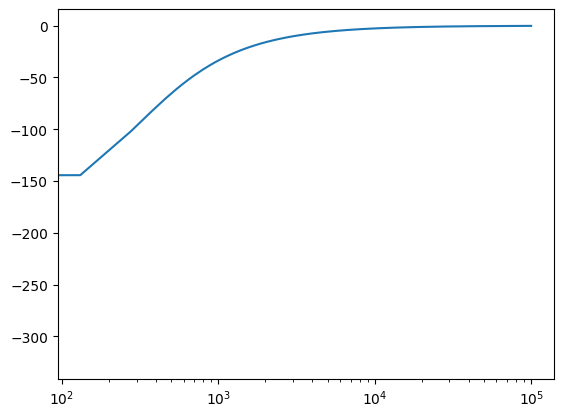

In [18]:
res = sns.lineplot(x=answer, y = dEdx)
res.set(xscale='log')


Проинтегрируем отношение энергии к изменению энергии от координаты, результатом будет являться полный пробег частицы в веществе

In [19]:
pip install simpy


In [20]:
import simpy as simp

In [21]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
EE = Symbol('EE,')
diE = Symbol('diE,')
integrate(EE/(diE), (EE, 0, 100000))





5000000000
----------
   diE,   

In [54]:
#Zair, density, Aair, Mra, C, Zra  = symbols("Zair, density, Aair, Mra, C, Zra")
Zair = Symbol('Zair')
density = Symbol('density')
Aair = Symbol('Aair')
Mra = Symbol('Mra')
C = Symbol('C')
Zra = Symbol('Zra')
Bv = Symbol('Bv')
R_radium=integrate(((3.1*10**(5))*((7.3*(2**2)*1.16*10**(-13))/(28.98*(Bv)**2))*(11.2 + log ((Bv**2)/(7.3*(1- (Bv)**2))) - (Bv)**2)), (Bv))


In [44]:
bibimbambom=integrate((((2*EE/Mra)**0.5)/C)**2, EE)
bibimbambom.subs(EE, 10).evalf()

               2.0
          / 1 \   
100.0*Mra*|---|   
          \Mra/   
------------------
         2        
        C         

In [78]:
ggs=min(speed)/c
bass=R_radium.subs(Bv, 1).evalf()

In [79]:
bass

zoo

## Пока что взять интеграл весьма сложной функции потери энергии взять не удается.
## Отойдем от изначального пути и проведем ориентировочный рассчет пробега Радия в высоком вакууме.